<h1 align="center"> Analyzing Okadabooks </h1>

This ia an Exploratory data analysis done on [okadabooks](https://okadabooks.com/), one of the leading e-book stores in Africa. Attached in this [repository](https://github.com/EdidiongEsu/okadabooks_scraper) of the  webscraper is a csv file of the data used in this analysis.



<h3 align="center"> Image of <a https://okadabooks.com/store> okadabooks store </a> Books' Layout</h3>

## Structure of the data
- Title -title of Book
- Author- writer of book
- Genre- genre of novel. For the purpose of this analysis, it also represents category of non-fiction books.
- Price- Price of book (In Naira)
- Reads -Number of times the book has been downloaded by readers
- Ratings- Rating of book (usually done by those who have read)
- Booklink- Link to full details about the book.

###  22 categories scraped
As stated above, 'Genre' will represent all categories

['science_fiction', 'business_finance', 'religion_and_beliefs',
 'self_help', 'mystery', 'educational', 'memoir', 'fiction',
 'non-fiction', 'health_living', 'other', 'children', 'romance',
 'adventure', 'free', 'raw_unpublished_works', 'comics', 'history',
'drama', 'poetry', 'humor', 'erotic']
       
Note that we can't say that the books in our dataset represents all books available on okadabooks. There may have been 403 errors/other faqctors that prevented some books from being scraped.

#### This Notebook has been broken into five major parts:
    - The Price Factor
    - Success Metric
    - Analyzing Genres
    - Analyzing Okadabook Authors
    - Book Numbering

<hr>
<h1 align="center">Loading the Clean Data</h1>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from operator import itemgetter
import numpy as np


pd.set_option('display.max_colwidth', -1)

In [2]:
df= pd.read_csv('okadabooks.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14843 entries, 0 to 14842
Data columns (total 8 columns):
Unnamed: 0    14843 non-null int64
Title         14843 non-null object
Author        14843 non-null object
Genre         14843 non-null object
Price         14843 non-null int64
Reads         14843 non-null int64
Ratings       14843 non-null float64
Booklink      14843 non-null object
dtypes: float64(1), int64(3), object(4)
memory usage: 927.8+ KB


In [4]:
df= df.drop(columns='Unnamed: 0')

In [5]:
df.head(2)

,Title,Author,Genre,Price,Reads,Ratings,Booklink
0,the long walk,Milton J Davis,science_fiction,360,0,0.0,https://okadabooks.com/book/about/the_long_walk/29737
1,bilisi: rebirth of the orisha #1.,Tomi Adegbite.,science_fiction,1500,0,0.0,https://okadabooks.com/book/about/bilisi_rebirth_of_the_orisha_1/29663


<h1 align="center">Summarizing the dataset</h1>

14k+ Books, 8k+ Authors

In [6]:
print('Number of books:', df.Title.shape[0])
print('Number of unique Titles:', df.Title.value_counts().shape[0])
print('Number of Authors:', df.Author.value_counts().shape[0])
print('Number of Categories:', len(df.Genre.unique()))
print('Total Number of reads:', sum(df.Reads))

Number of books: 14843
Number of unique Titles: 14434
Number of Authors: 8835
Number of Categories: 22
Total Number of reads: 576298


### Range of reads (0- 14k) Reads

In [7]:
print("Minimum #times a book has been read:", df.Reads.min())
print("Maximum #times a book has been read:", df.Reads.max())

Minimum #times a book has been read: 0
Maximum #times a book has been read: 14000


---
<h1 align="center">The Price Factor</h1>

Because there is a price tag on every book, A look into the price spread across books is important. My finding corelates with okadabooks initial intitiative of trying to make books easily accessible in the country 

**About 48% of books are Free on okadaboooks.**  What impact does this have on our analysis?

### Percentage of free books

Side Note: <i>Gold is used predominantly in the plots as it is the color symbol for okadabooks.com</i>

In [8]:
def plot_double(x, height, leftlabel, rightlabel, xlabel=None, ylabel=None, ylocs=None, yticks=None, title=None):
    plt.figure(figsize=(7,7.2))
    plt.bar(x, height, color="#efcc00")
    plt.text(0-.1,height[0]+(max(height)*0.05), str(round(100*height[0]/sum(height),1))+"%", fontsize=14)
    plt.text(1-.1,height[1]+(max(height)*0.05), str(round((100*height[1]/sum(height)),1))+"%", fontsize=14)

    plt.title(title, fontsize=14, color ='black')
    plt.xticks([0,1], [leftlabel, rightlabel], fontsize=13)
    if xlabel:
        plt.xlabel(xlabel,fontsize=14)
    if ylabel:
        plt.ylabel(ylabel,fontsize=14)
    if ylocs:
        plt.yticks(ylocs, yticks)


    plt.show()


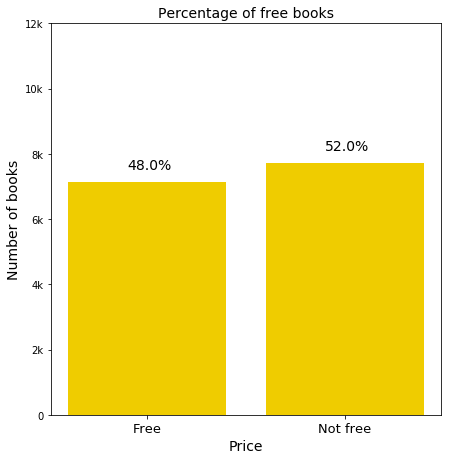

In [9]:
all_books= df.shape[0] 
free_books= df[df.Price==0].shape[0]
priced_books= all_books-free_books

x = [0, 1]
height= [free_books, priced_books]

ylocs = [0, 2000, 4000, 6000, 8000, 10000, 12000]
yticks = ["0","2k", '4k',  "6k",  "8k", "10k", '12k',]

plot_double(x, height,
            "Free",
            "Not free",
            xlabel="Price",
            ylabel="Number of books",
            ylocs=ylocs,
            yticks=yticks,
           title = "Percentage of free books")



## How frequently are books read on okadabooks?

This section gives an estimate into how frequently books are bought on okadabooks. 

### Most books have been read less than Ten times.

Here we find that most books have been read (Less than ten).  **58% of books on okadabooks have been read less than 10 times.** Notice how different the sizes of the bins are. Clearly the distribution of reads is highly skewed towards zero.

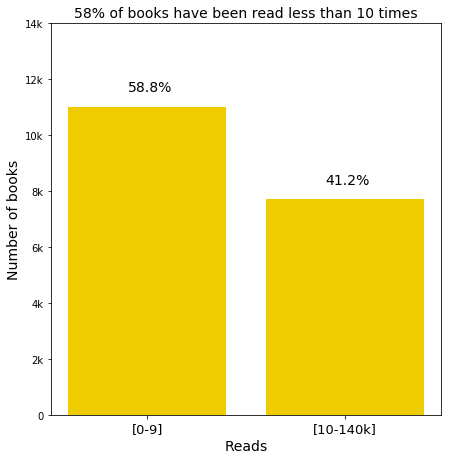

In [10]:
all_books= df.shape[0] 
under10= df[df.Reads<10].shape[0]
over10= all_books-free_books

x = [0, 1]
height= [under10, over10]

ylocs = [0, 2000, 4000, 6000, 8000, 10000, 12000,14000]
yticks = ["0","2k", '4k',  "6k",  "8k", "10k", '12k', '14k']

plot_double(x, height,
            "[0-9]",
            "[10-140k]",
            xlabel="Reads",
            ylabel="Number of books",
            ylocs=ylocs,
            yticks=yticks,
           title = "58% of books have been read less than 10 times")


## Most free books have been read less than Ten times.
Here we find out how frequently free books have been read. **58% of books on okadabooks have been read less than 10 times.**

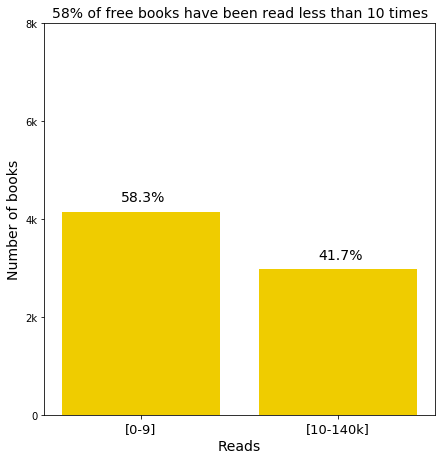

In [11]:
free_df= df[(df.Price==0)]
free_books= free_df.shape[0] 
under10= free_df[free_df.Reads<10].shape[0]
over10= free_books-under10

x = [0, 1]
height= [under10, over10]

ylocs = [0, 2000, 4000, 6000, 8000, ]
yticks = ["0","2k", '4k',  "6k",  "8k"]

plot_double(x, height,
            "[0-9]",
            "[10-140k]",
            xlabel="Reads",
            ylabel="Number of books",
            ylocs=ylocs,
            yticks=yticks,
           title = "58% of free books have been read less than 10 times")

## How frequently are books bought on okadabooks

This determines how many people are spending money on books. What percentage of Priced books are being read?

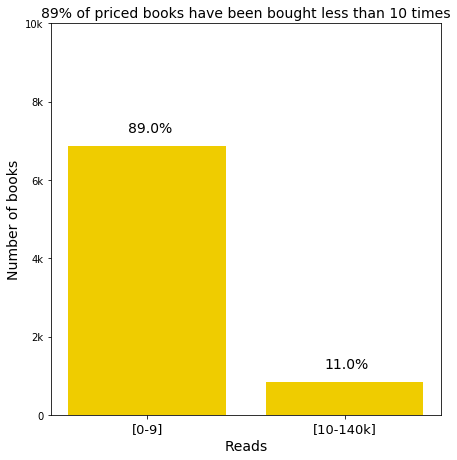

In [12]:
priced_df= df[(df.Price>0)]
priced_books= priced_df.shape[0] 
under10= priced_df[priced_df.Reads<10].shape[0]
over10= priced_books-under10

x = [0, 1]
height= [under10, over10]

ylocs = [0, 2000, 4000, 6000, 8000, 10000]
yticks = ["0","2k", '4k',  "6k",  "8k", "10k"]

plot_double(x, height,
            "[0-9]",
            "[10-140k]",
            xlabel="Reads",
            ylabel="Number of books",
            ylocs=ylocs,
            yticks=yticks,
           title = "89% of priced books have been bought less than 10 times")

I was suprised by my findings here as I thought there would be at least 40% of priced books being read more than 9 times.

---

<h1 align="center">Success Metric</h1>

The success metric for an okadabook author will be generated here. In this analysis, we will say exceptional books have the 99th percentile of reads.  
While success could be considered to be relative to everyone, **what realistic benchmarks could authors look forward to after publishing his/her book on okadabooks?**

### Exceptional books have been read 716 times.
To get a better understanding of how many books are exceptional (99th percentile), a plot of a smooth estimation of the distribution of reads in our data will be done. We see below the frequency of books who have been read a certain number of times.

A vast majority of books have been read less than ten times, However, there are quite a few books whose reads are above the 99th percentile. **Note that the range of the reads (0-14k) extends far beyond the range of the plot.** Also notice that the 99th percentile of claps is included in the visual-**<i>Falling at 716 claps</i>**. **Therefore, the cutoff for an exceptional book on okadabooks is 716 reads.**

In [13]:
def frequency_plot(kde_data,title='',ylocs=[],yticks=[]):
    plt.figure(figsize=(12,6))
    plt.xlim(0,max(kde_data.Reads))
    sns.kdeplot(kde_data.Reads,bw='scott', shade=True,shade_lowest=False, legend=False, color = "#efcc00")
    sns.kdeplot(kde_data.Reads,bw='scott', shade=True,shade_lowest=True, legend=False, color = "#efcc00")  ##styling technique (optional)
    nine_nine= kde_data.Reads.quantile(0.99)
    plt.axvline(x=nine_nine, color="gold")
    plt.axvspan(nine_nine,plt.xlim()[1], facecolor='#efcc00', alpha=0.2)
    plt.text((plt.xlim()[1]/2.33), (plt.ylim()[1]/2.5),
             'Top 1%='+ str(int(nine_nine))+' Reads',
             fontsize=14)
    plt.xticks(xlocs,xticks)
    plt.xlabel('Reads', fontsize=14)
    plt.ylabel('Frequency of Reads', fontsize=14)
    plt.yticks([])
    

    plt.title(title, fontsize=14)
    
    plt.show()




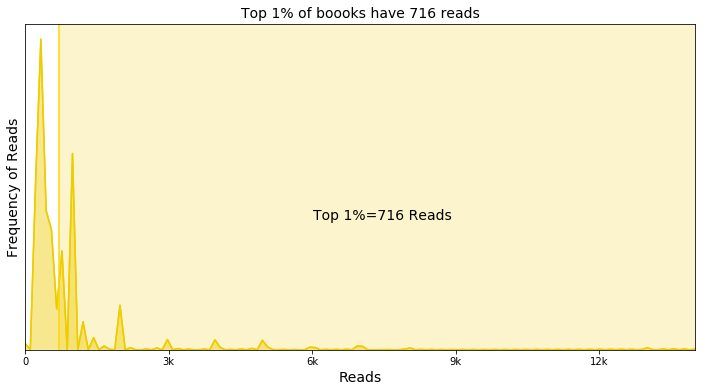

In [32]:
xlocs = [0,3000,6000,9000,12000]
xticks = ['0','3k','6k','9k','12k']

frequency_plot(kde_data= df, title='Top 1% of boooks have 716 reads',ylocs=ylocs, yticks=yticks)



### Exceptional books(that are not free) have been read 180 times.
I think this is an important metric because of purchasing power. The drastic drop between the 99th percentiles show how huge of an impact it is.
This can be used as the first success metric for okadabook authors(especially for those who have put a price on its book).


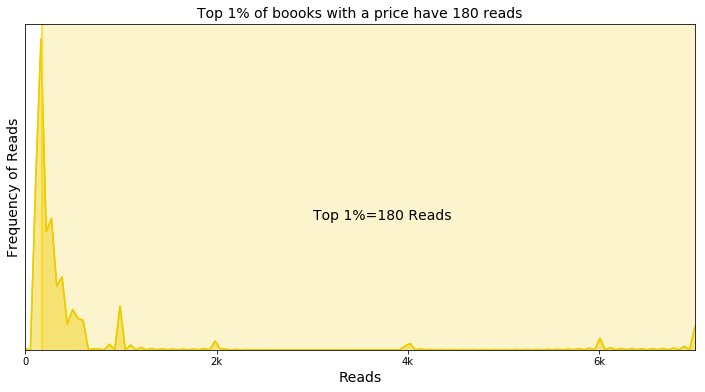

In [15]:
not_free= df[df.Price!=0]

xlocs = [0,2000,4000,6000,]
xticks = ['0','2k','4k','6k',]

frequency_plot(kde_data= not_free, title='Top 1% of boooks with a price have 180 reads',ylocs=ylocs, yticks=yticks)

---

<h1 align='center' >Analyzing Genres</h1>

In [16]:
genre_length=[]
genre_name= []
for genre in df.Genre.unique():
    genre_length.append(len(df[df.Genre==genre]))
    genre_name.append(genre)
    
sort_helper = sorted(zip(genre_name,genre_length), key=itemgetter(1))
sorted_name= [element for bracket in sort_helper for element in bracket][::2]
sorted_number= [element for bracket in sort_helper for element in bracket][1::2]

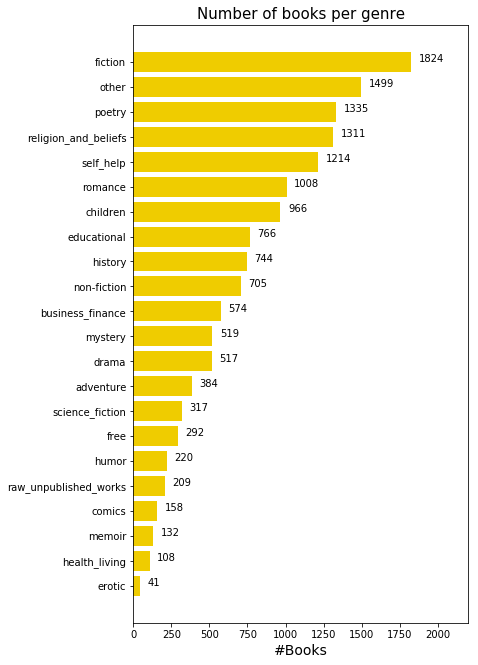

In [17]:

plt.figure(figsize=(6,11))
plt.xlim(0,2200)
plt.barh(sorted_name, sorted_number, color="#efcc00", )

for i in range(len(sorted_number)):
    plt.text(sorted_number[i]+50,i,str(sorted_number[i]))
plt.barh(sorted_name, sorted_number, color="#efcc00", )
plt.title('Number of books per genre', fontsize=15)
plt.xlabel('#Books', fontsize=14)
plt.show()


## Total reads per genre

In [18]:
reads_per_genre=[]
for i in df.Genre.unique():
    reads_per_genre.append(sum(df[df.Genre==i].Reads))
    genre_name.append(genre)

    
sort_helper = sorted(zip(genre_name,reads_per_genre), key=itemgetter(1))
sorted_name= [element for bracket in sort_helper for element in bracket][::2]
sorted_number= [element for bracket in sort_helper for element in bracket][1::2]
    


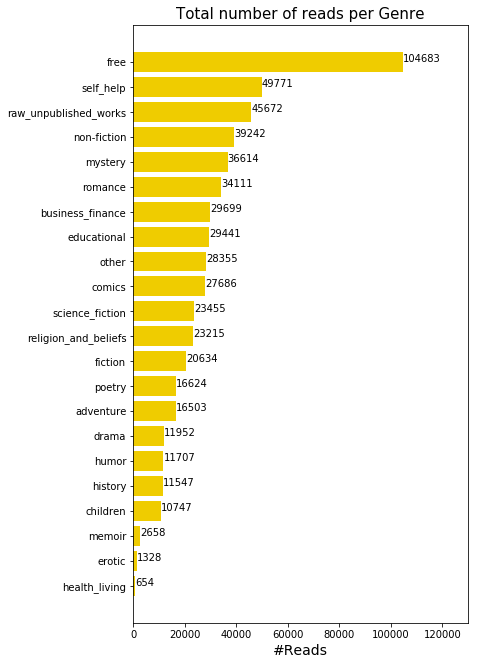

In [19]:

plt.figure(figsize=(6,11))
plt.xlim(0,130000)
plt.barh(sorted_name, sorted_number, color="#efcc00", )

for i in range(len(sorted_number)):
    plt.text(sorted_number[i]+50,i,str(sorted_number[i]))

plt.title('Total number of reads per Genre', fontsize=15)
plt.xlabel('#Reads', fontsize=14)
plt.show()


### Number of reads exceptional books receive for each tag

If you were to measure your book's performance, you might compare it to whichever 99th percentile is highest. That may be the population metric of 716 reads, or the 99th percentile of the category you write in.

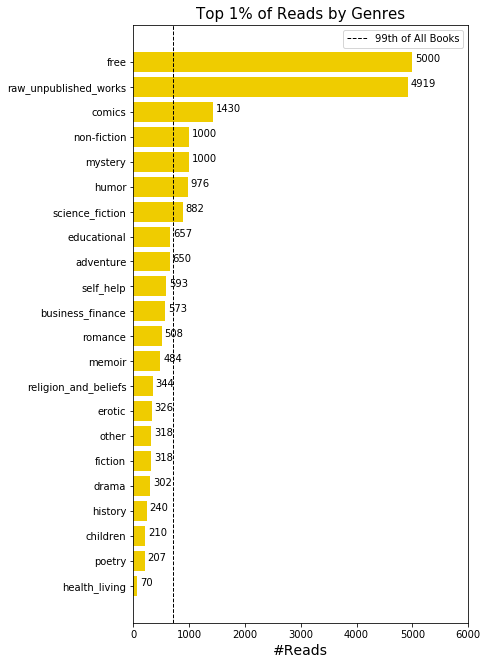

In [20]:
genre_ninenine=[]
for i in df.Genre.unique():
    genre_ninenine.append(df[df.Genre==i].Reads.quantile(0.99))
    
sort_helper = sorted(zip(genre_name,genre_ninenine), key=itemgetter(1))
sorted_name= [element for bracket in sort_helper for element in bracket][::2]
sorted_number= [element for bracket in sort_helper for element in bracket][1::2]

plt.figure(figsize=(6,11))
plt.xlim(0,6000)
plt.barh(sorted_name, sorted_number, color="#efcc00", )
for i in range(len(sorted_number)):
    plt.text(sorted_number[i]+50,i,str(int(sorted_number[i])))
    
ninenine= df.Reads.quantile(0.99)

plt.axvline(x=ninenine, color="black", label="99th of All Books", lw=1,linestyle='--')
plt.legend()




plt.title('Top 1% of Reads by Genres', fontsize=15)
plt.xlabel('#Reads', fontsize=14)
plt.show()

---

<h1 align='center' >Analyzing Okadabook Authors</h1>


### Authors with the highest Number of reads

I was intigued by the first name, Okechukwu Ofili. He is the founder of okadabooks and has gathered the highest number of reads.

In [21]:
name=[]
total_reads=[]
def most_reads():
    for i in df.Author.unique():
        name.append(i)
        total_reads.append(sum(df[df.Author==i].Reads))
    no_reads=dict(zip(name,total_reads))
    reads=sorted(no_reads.items(), key=itemgetter(1), reverse=True)
    
    dash = '-' *80
    print(dash)
    print('{:<20s}{:>40s}'.format("Author", '#Reads'))
    print(dash)    

    for key,value in reads[:10]:
        print('{:<34s}{:^48d}'.format(key,value))
        

In [22]:
most_reads()

--------------------------------------------------------------------------------
Author                                                #Reads
--------------------------------------------------------------------------------
Okechukwu Ofili                                        21170                      
Steve Harris                                           19293                      
Tunde Leye                                             19070                      
Comic Republic                                         15459                      
okadabooks.com                                          9443                      
Sharon Abimbola Salu                                    8000                      
Charles Dickens                                         7738                      
Tonwa Anthony                                           7000                      
The Federal Republic Of Nigeria                         7000                      
Unknown                       

### Authors with the most books

In [23]:
def print_list(data):
    dash = '-' * 80
    for i in range(len(data)):
        if i == 0:
            print(dash)
            print('{:<8s}{:<7s}{:^25s}'.format("Rank",'Books',"Author"))
            print(dash)
        author = data.index[i]
        print('{:<8d}{:<10d}{:<25s}'.format(i+1,int(data[i]),author))

In [24]:
print('Authors with the most books')
print()
print_list(df.Author.value_counts()[:10])    

Authors with the most books

--------------------------------------------------------------------------------
Rank    Books           Author          
--------------------------------------------------------------------------------
1       243       Unknown                  
2       216       African Storybook Initiative
3       210       Hausa Novels             
4       119       Shakespeare, William     
5       88        Sunday Adelaja           
6       85        Various                  
7       70        Jacobs, W. W. (William Wymark)
8       62        Comic Republic           
9       61        Bryan  Unyimadu          
10      42        Anonymous                


### How many books did most authors write?

An interesting insight is that 79% of Authors on okadabooks have written only one book.

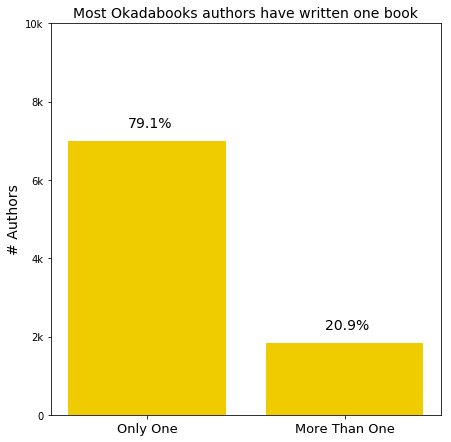

In [25]:
author_counts = df.Author.value_counts()
single_books = author_counts[author_counts<2].shape[0]
all_authors = author_counts.shape[0]
much_books = all_authors-single_books


x = [0, 1]
height= [single_books, much_books]

ylocs = [0, 2000, 4000, 6000, 8000, 10000]
yticks = ["0","2k", '4k',  "6k",  "8k", "10k"]


plot_double(x, height,
            "Only One",
            "More Than One",
            xlabel=None,
            ylabel="# Authors",
            ylocs=ylocs,
            yticks=yticks,
            
            title="Most Okadabooks authors have written one book")

## Prolific Authors

This helps answer the question; How many BOOKS do the most frequently published authors write?

**Prolific writers (top 1% most published) have written more than 10 books**

In [26]:
def author_frequency(kde_data,title='',ylocs=[],yticks=[]):
    plt.figure(figsize=(12,6))
    plt.xlim(0,max(kde_data))
    sns.kdeplot(kde_data,bw='scott', shade=True,shade_lowest=False, legend=False, color = "#efcc00")
    sns.kdeplot(kde_data,bw='scott', shade=True,shade_lowest=True, legend=False, color = "#efcc00")  ##styling technique (optional)
    nine_nine= kde_data.quantile(0.99)
    plt.axvline(x=nine_nine, color="gold")
    plt.axvspan(nine_nine,plt.xlim()[1], facecolor='#efcc00', alpha=0.2)
    plt.text((plt.xlim()[1]/2.33), (plt.ylim()[1]/2.5),
             'Top 1%='+ str(int(nine_nine))+' Books',
             fontsize=14)
    plt.xticks(xlocs,xticks)
    plt.xlabel('Number of books', fontsize=14)
    plt.ylabel('Frequency of Books', fontsize=14)
    plt.yticks([])
    

    plt.title(title, fontsize=14)
    
    plt.show()

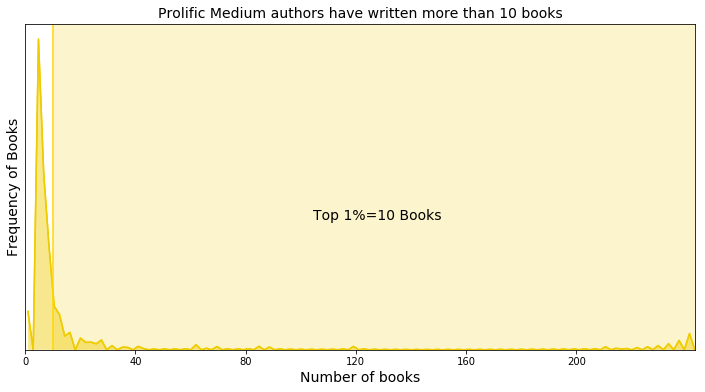

In [27]:
xlocs = [0,40,80,120,160, 200]
xticks = ['0','40','80','120','160', '200']


author_frequency(df.Author.value_counts(), title="Prolific Medium authors have written more than 10 books",
               ylocs=ylocs, yticks=yticks)



---

<h1 align='center' >Book Numbering</h1>

### First three books to be published on okadabooks

From a quick observation of the website. okadabook's url structure is:
**base/book/about/book_title/book_number** 

An example is **https://okadabooks.com/book/about/we_should_all_be_feminists_tedx_euston_talk_2_13/9576**

**The first two books were written by the founder of okadabooks.**

In [28]:
df['book_number']= df.Booklink.map(lambda link: link.split("/")[-1])
df.book_number= df.book_number.astype(int)

In [29]:
df.head(2)

,Title,Author,Genre,Price,Reads,Ratings,Booklink,book_number
0,the long walk,Milton J Davis,science_fiction,360,0,0.0,https://okadabooks.com/book/about/the_long_walk/29737,29737
1,bilisi: rebirth of the orisha #1.,Tomi Adegbite.,science_fiction,1500,0,0.0,https://okadabooks.com/book/about/bilisi_rebirth_of_the_orisha_1/29663,29663


In [30]:
df.nsmallest(3,'book_number')

,Title,Author,Genre,Price,Reads,Ratings,Booklink,book_number
889,how stupidity saved my life,Okechukwu Ofili,business_finance,750,270,4.38,https://okadabooks.com/book/about/how_stupidity_saved_my_life/1,1
890,how laziness saved my life (preview),Okechukwu Ofili,business_finance,0,14000,3.96,https://okadabooks.com/book/about/how_laziness_saved_my_life_preview/2,2
2201,the diary of a desperate naija woman,Bola Essien-Nelson,religion_and_beliefs,150,106,4.50,https://okadabooks.com/book/about/the_diary_of_a_desperate_naija_woman/3,3


In [31]:
print('The first three books published on Okadabooks are', '\n')

print(df.nsmallest(3,'book_number').Title)

The first three books published on Okadabooks are 

889     how stupidity saved my life           
890     how laziness saved my life (preview)  
2201    the diary  of a  desperate naija woman
Name: Title, dtype: object


These were the first three books to be published on okadabooks. I was intrigued by the writer of the first two books, Okechukwu OFili, who is the founder of okadabooks.
